<a href="https://colab.research.google.com/github/Shravanisk205/DC/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#linear regression
import pandas as pd
#load dataset
df=pd.read_csv("Housing.csv")




In [5]:
#Display first few rows
print(df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [6]:
#convert categorial columns into numerical using one hot encoding
df=pd.get_dummies(df,drop_first=True)
#drop_first=True avoids dummy variable trap,which occurs when one category can be predicted from others

#display tranformed dataset
print(df.head())

      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0          True  

In [7]:
#split features and target variables
x=df.drop(columns=["price"])#features
y=df["price"] #target variables


In [9]:
from sklearn.model_selection import train_test_split
#split into training (80%)and testing set(20%)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [10]:
from sklearn.preprocessing import StandardScaler
#initialize scaler
scaler=StandardScaler()
#fit and transform training data ,transform test data
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [11]:
from sklearn.linear_model import LinearRegression
#initialize and train the model'
model=LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [12]:
#predict on test data
y_pred=model.predict(x_test_scaled)


In [13]:
from sklearn.metrics import mean_squared_error,r2_score
#calculate mse and r2 score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error:{mse}")
print(f"R2_Score:{r2}")

Mean Squared Error:1754318687330.6677
R2_Score:0.6529242642153177


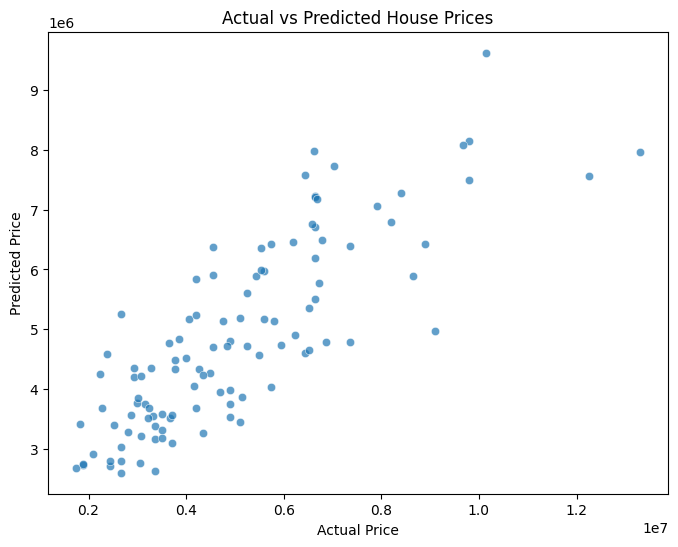

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
#scatter plot of actual and predicted price
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test,y=y_pred ,alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()